# Multiple Linear Regression in House Price with PyTorch

## Import libraries

In [2]:
!pip install torch torchvision torchaudio

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import torch
from torch import nn
%matplotlib inline

In [4]:
# Display all columns
pd.set_option('display.max_columns', None)
# Display all rows
pd.set_option('display.max_rows', None)

## Loading dataset

In [5]:
df = pd.read_csv('/Users/andreuolaortua/Desktop/code/Machine learning/00 - Projects/Project 14 - Multiple Linear Regression in House Price/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [8]:
df.drop(['id', 'lat', 'long'], axis=1, inplace=True)

In [9]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

In [10]:
df['bathrooms'] = df['bathrooms'].round(0).astype(int)

In [11]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650
1,20141209T000000,538000.0,3,2,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639
2,20150225T000000,180000.0,2,1,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062
3,20141209T000000,604000.0,4,3,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000
4,20150218T000000,510000.0,3,2,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503


## Dealing with missing values

In [12]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
sqft_living15    0
sqft_lot15       0
dtype: int64

There is no missing values

In [13]:
warnings.filterwarnings("ignore", category=FutureWarning)

## Visualization of Relations

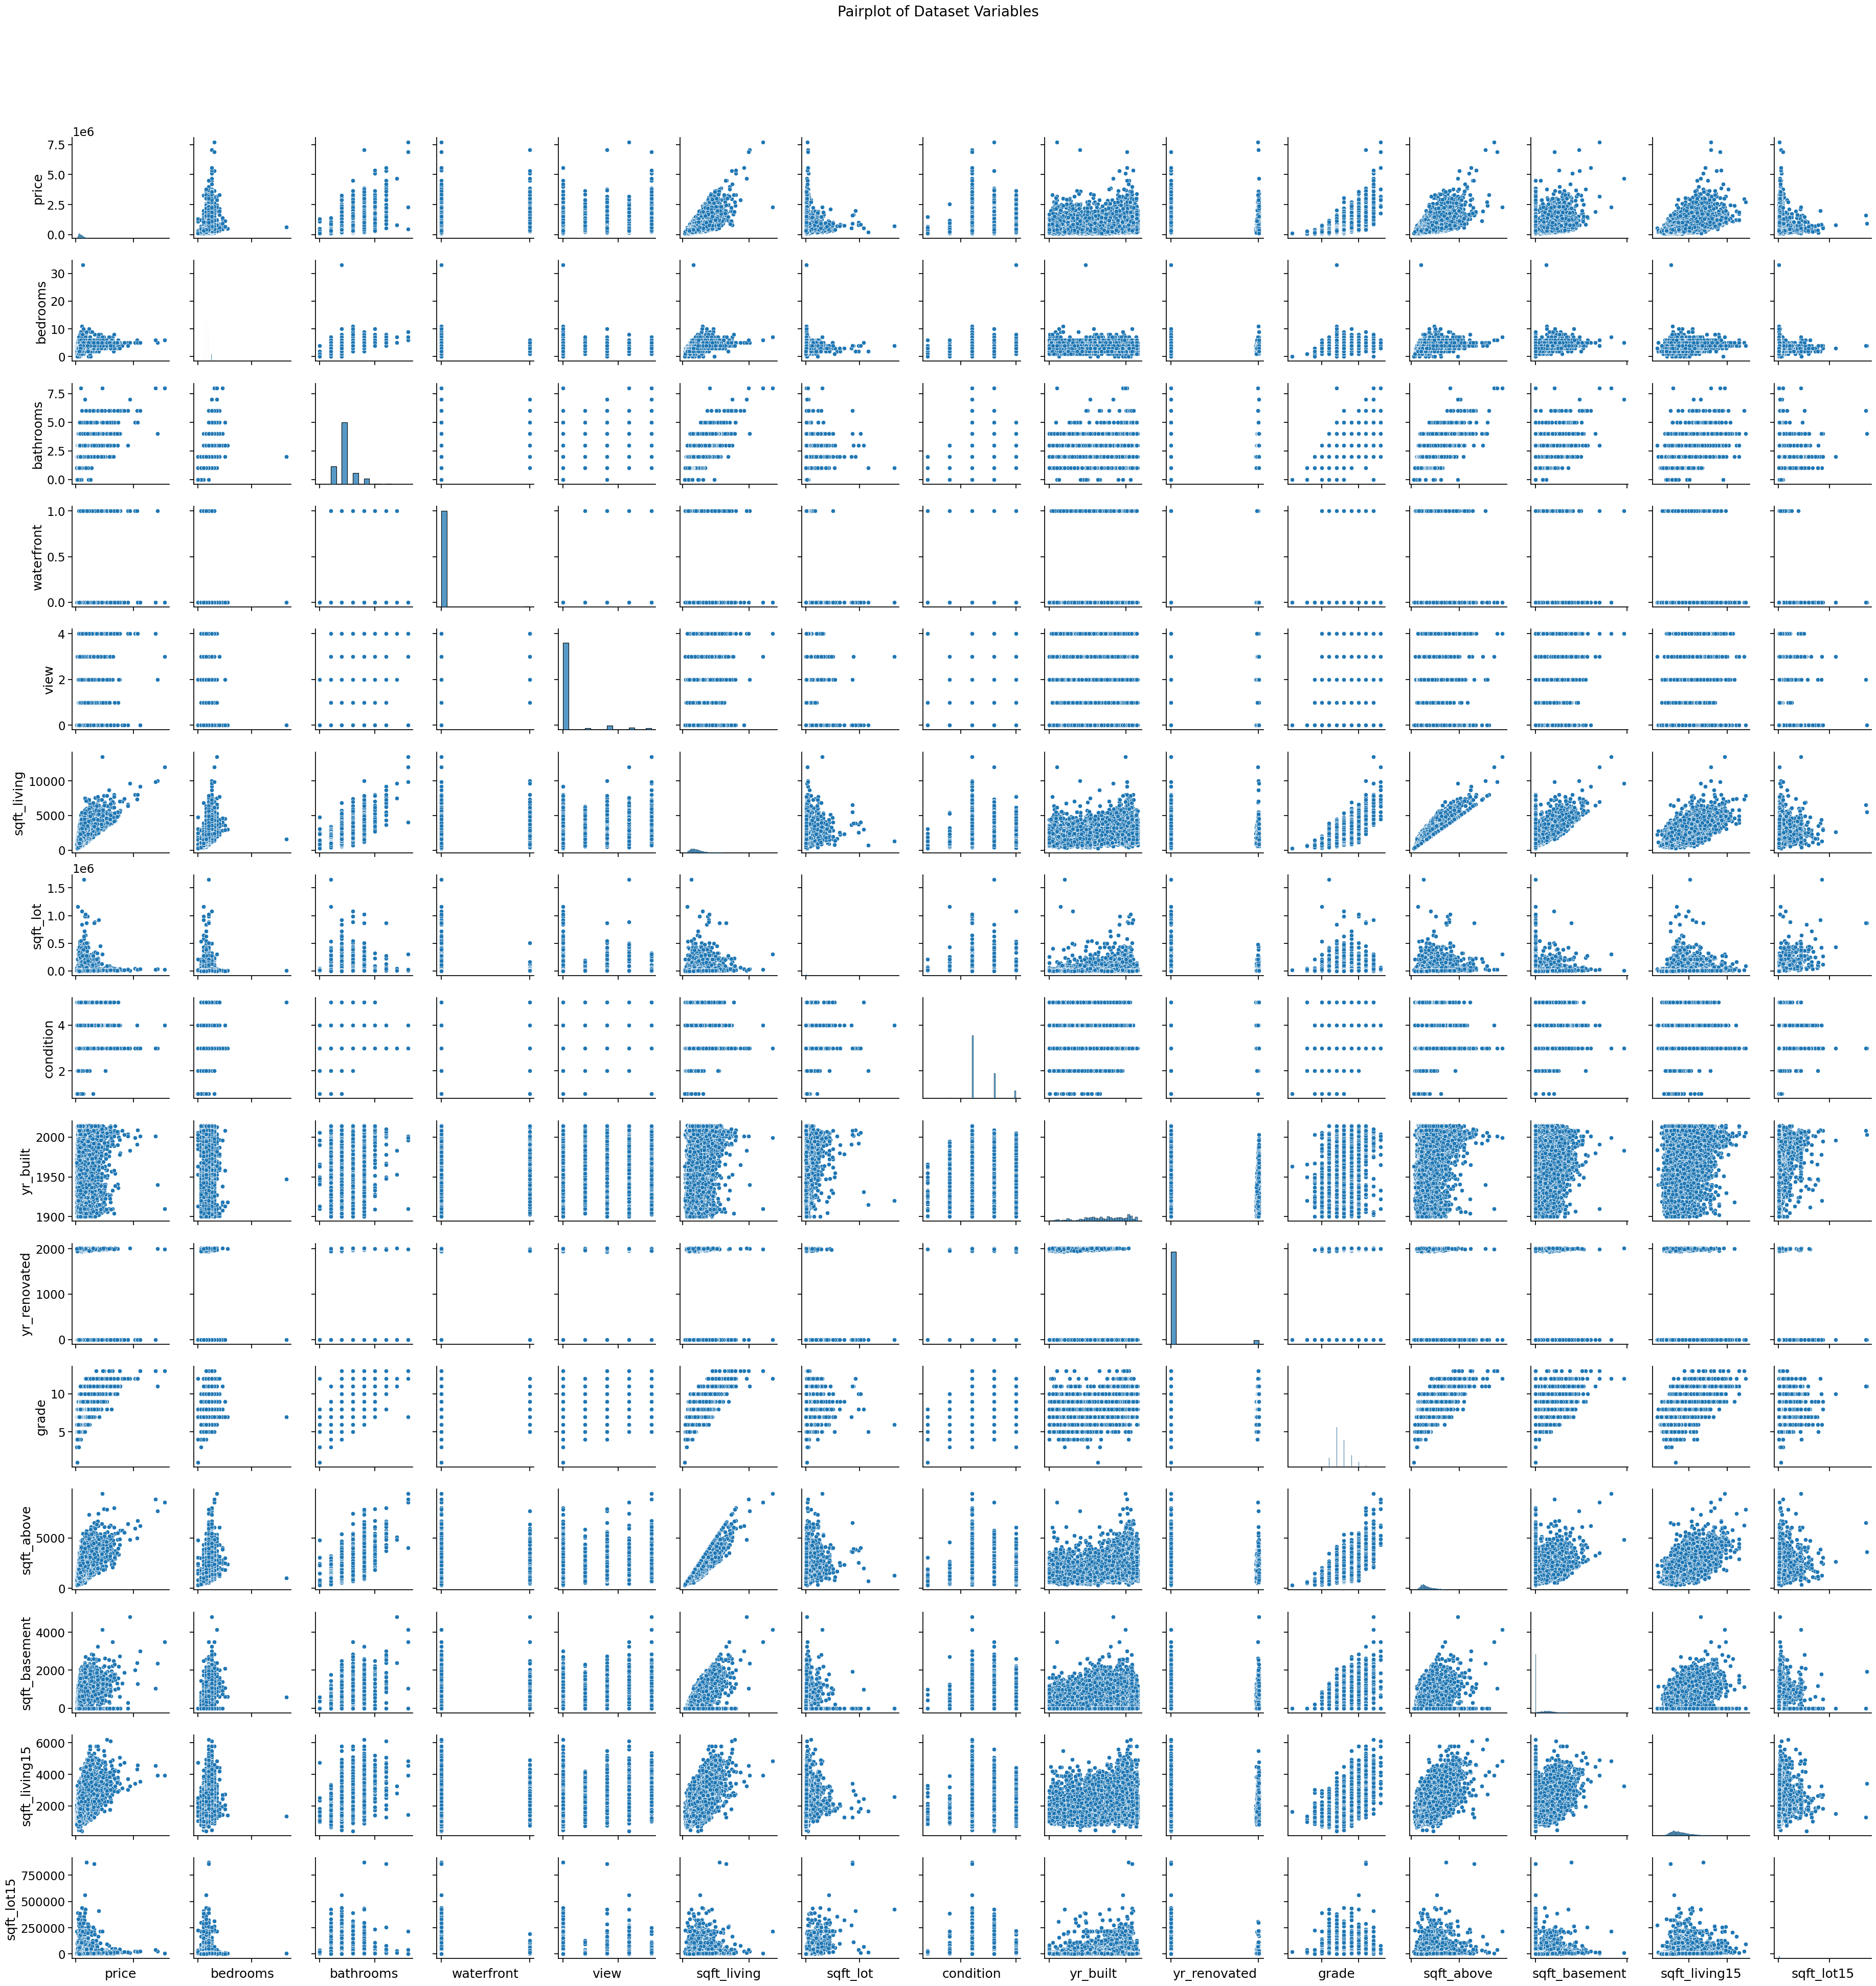

In [14]:
with sns.plotting_context("notebook", font_scale = 1.5):
    g = sns.pairplot(df, vars=['price', 'bedrooms', 'bathrooms','waterfront','view',
                               'sqft_living', 'sqft_lot', 'condition', 'yr_built',
                               'yr_renovated','grade', 'sqft_above', 'sqft_basement', 
                               'sqft_living15', 'sqft_lot15'])
    g.set(xticklabels=[])
    plt.suptitle('Pairplot of Dataset Variables', y = 1.05, fontsize = 20)
    plt.show()

The features with a high relationship with price that will be considered are sqft_living, sqft_above, sqft_basement, bedrooms, bathrooms and sqft_living15.

## One-hot encoding

In [15]:
def onehot_encode(df, column, prefix):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=prefix)
    dummies = dummies.astype(int)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

df = onehot_encode(df, 'zipcode', 'zip')
df = onehot_encode(df, 'condition', 'house_condition')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,zip_98001,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98010,zip_98011,zip_98014,zip_98019,zip_98022,zip_98023,zip_98024,zip_98027,zip_98028,zip_98029,zip_98030,zip_98031,zip_98032,zip_98033,zip_98034,zip_98038,zip_98039,zip_98040,zip_98042,zip_98045,zip_98052,zip_98053,zip_98055,zip_98056,zip_98058,zip_98059,zip_98065,zip_98070,zip_98072,zip_98074,zip_98075,zip_98077,zip_98092,zip_98102,zip_98103,zip_98105,zip_98106,zip_98107,zip_98108,zip_98109,zip_98112,zip_98115,zip_98116,zip_98117,zip_98118,zip_98119,zip_98122,zip_98125,zip_98126,zip_98133,zip_98136,zip_98144,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199,house_condition_1,house_condition_2,house_condition_3,house_condition_4,house_condition_5
0,20141013T000000,221900.0,3,1,1180,5650,1.0,0,0,7,1180,0,1955,0,1340,5650,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,20141209T000000,538000.0,3,2,2570,7242,2.0,0,0,7,2170,400,1951,1991,1690,7639,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,20150225T000000,180000.0,2,1,770,10000,1.0,0,0,6,770,0,1933,0,2720,8062,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,20141209T000000,604000.0,4,3,1960,5000,1.0,0,0,7,1050,910,1965,0,1360,5000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,20150218T000000,510000.0,3,2,1680,8080,1.0,0,0,8,1680,0,1987,0,1800,7503,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [16]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15', 'zip_98001',
       'zip_98002', 'zip_98003', 'zip_98004', 'zip_98005', 'zip_98006',
       'zip_98007', 'zip_98008', 'zip_98010', 'zip_98011', 'zip_98014',
       'zip_98019', 'zip_98022', 'zip_98023', 'zip_98024', 'zip_98027',
       'zip_98028', 'zip_98029', 'zip_98030', 'zip_98031', 'zip_98032',
       'zip_98033', 'zip_98034', 'zip_98038', 'zip_98039', 'zip_98040',
       'zip_98042', 'zip_98045', 'zip_98052', 'zip_98053', 'zip_98055',
       'zip_98056', 'zip_98058', 'zip_98059', 'zip_98065', 'zip_98070',
       'zip_98072', 'zip_98074', 'zip_98075', 'zip_98077', 'zip_98092',
       'zip_98102', 'zip_98103', 'zip_98105', 'zip_98106', 'zip_98107',
       'zip_98108', 'zip_98109', 'zip_98112', 'zip_98115', 'zip_98116',
       'zip_98117', 'zip_98118', 'zip_98119', 

## Creating Tensor

In [17]:
Independent_In_Tensor, Price_In_Tensor = torch.tensor(df[['sqft_living','grade' ,'sqft_above', 'sqft_lot','sqft_basement', 'bathrooms','sqft_living15',
       'sqft_lot15','zip_98001', 'zip_98002', 'zip_98003', 'zip_98004', 'zip_98005',
       'zip_98006', 'zip_98007', 'zip_98008', 'zip_98010', 'zip_98011',
       'zip_98014', 'zip_98019', 'zip_98022', 'zip_98023', 'zip_98024',
       'zip_98027', 'zip_98028', 'zip_98029', 'zip_98030', 'zip_98031',
       'zip_98032', 'zip_98033', 'zip_98034', 'zip_98038', 'zip_98039',
       'zip_98040', 'zip_98042', 'zip_98045', 'zip_98052', 'zip_98053',
       'zip_98055', 'zip_98056', 'zip_98058', 'zip_98059', 'zip_98065',
       'zip_98070', 'zip_98072', 'zip_98074', 'zip_98075', 'zip_98077',
       'zip_98092', 'zip_98102', 'zip_98103', 'zip_98105', 'zip_98106',
       'zip_98107', 'zip_98108', 'zip_98109', 'zip_98112', 'zip_98115',
       'zip_98116', 'zip_98117', 'zip_98118', 'zip_98119', 'zip_98122',
       'zip_98125', 'zip_98126', 'zip_98133', 'zip_98136', 'zip_98144',
       'zip_98146', 'zip_98148', 'zip_98155', 'zip_98166', 'zip_98168',
       'zip_98177', 'zip_98178', 'zip_98188', 'zip_98198', 'zip_98199','house_condition_1', 'house_condition_2', 'house_condition_3',
       'house_condition_4', 'house_condition_5']].values, dtype = torch.float32), torch.tensor(df[['price']].values, dtype = torch.float32)

In [18]:
Independent_In_Tensor, Price_In_Tensor

(tensor([[1.1800e+03, 7.0000e+00, 1.1800e+03,  ..., 1.0000e+00, 0.0000e+00,
          0.0000e+00],
         [2.5700e+03, 7.0000e+00, 2.1700e+03,  ..., 1.0000e+00, 0.0000e+00,
          0.0000e+00],
         [7.7000e+02, 6.0000e+00, 7.7000e+02,  ..., 1.0000e+00, 0.0000e+00,
          0.0000e+00],
         ...,
         [1.0200e+03, 7.0000e+00, 1.0200e+03,  ..., 1.0000e+00, 0.0000e+00,
          0.0000e+00],
         [1.6000e+03, 8.0000e+00, 1.6000e+03,  ..., 1.0000e+00, 0.0000e+00,
          0.0000e+00],
         [1.0200e+03, 7.0000e+00, 1.0200e+03,  ..., 1.0000e+00, 0.0000e+00,
          0.0000e+00]]),
 tensor([[221900.],
         [538000.],
         [180000.],
         ...,
         [402101.],
         [400000.],
         [325000.]]))

In [19]:
Independent_In_Tensor.shape, Price_In_Tensor.shape

(torch.Size([21613, 83]), torch.Size([21613, 1]))

## Splitting Tensor in train and test tensor

In [20]:
train_split = int(0.8*len(Independent_In_Tensor))
X_train, y_train = Independent_In_Tensor[:train_split], Price_In_Tensor[:train_split]
X_test, y_test = Independent_In_Tensor[train_split:], Price_In_Tensor[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(17290, 17290, 4323, 4323)

## Model

In [21]:
class MultipleLinearRegressionModel(nn.Module):
    def __init__(self, num_features):
        super(MultipleLinearRegressionModel, self).__init__()
        #Initialize weights and bias as parameters
        self.weights = nn.Parameter(torch.randn(num_features), requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1), requires_grad=True)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        # Compute the linear combination of the input features
        linear_output = torch.matmul(x, self.weights) + self.bias
        return linear_output

### Initializing the model

In [22]:
torch.manual_seed(41)
num_features = X_train.shape[1]

# Initialize the model
model_0 = MultipleLinearRegressionModel(num_features)

### Setup loss function and optimizer

In [23]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model_0.parameters(), lr = 0.01)

In [24]:
list(model_0.parameters())

[Parameter containing:
 tensor([ 0.2465, -0.4717, -1.5184, -0.2124,  0.5660, -1.6637,  0.3338,  1.6051,
         -0.6919, -0.5399, -0.9585, -0.5706, -0.5434, -0.4347,  0.4036, -0.3977,
         -0.7593, -0.9401,  0.2895, -0.3930,  0.1495, -1.4453,  0.3230,  0.2691,
         -1.8582,  0.6758,  0.6179, -0.7597,  0.3135,  1.2129, -1.0562,  1.9104,
         -0.3103, -0.2846, -1.2708,  2.7563,  1.7416, -0.6473,  1.2869,  0.2798,
         -1.0929, -1.0251,  0.1212,  0.6108, -0.3316,  0.5742, -2.0137,  0.8630,
         -0.8498, -1.9837,  0.0832, -1.2066, -0.3511, -0.1648, -0.3937,  0.2237,
         -0.6855, -1.1598, -0.3605, -0.0950,  1.1122,  0.3517,  0.9366, -0.1875,
          1.3988, -0.0521, -1.0056,  0.9786, -1.3384,  1.1003,  1.2431, -0.4991,
         -1.2313,  1.1386, -0.3020, -1.1019, -0.2384,  0.5583, -1.9817,  0.8498,
         -0.3904,  0.3433, -0.8983], requires_grad=True),
 Parameter containing:
 tensor([-0.0466], requires_grad=True)]

In [25]:
list(model_0.parameters())[1].shape, y_train.shape

(torch.Size([1]), torch.Size([17290, 1]))

The model is expecting a single output value but the target variable is a 2D tensor with multiple samples. We will use squeeze() function to solve this issue.

In [26]:
y_train = y_train.squeeze()
y_test = y_test.squeeze()
y_train.shape, y_test.shape

(torch.Size([17290]), torch.Size([4323]))

## Training the model and evaluation

In [27]:
epochs = 10000
epoch_count=[]
loss_values=[]
test_loss_values=[]

for epoch in range(epochs+1):
    model_0.train()

    # Forward pass
    y_pred = model_0(X_train)

    # compute loss
    loss = loss_fn(y_pred, y_train)
    rmse = torch.sqrt(loss)

    # Zero the gradients
    optimizer.zero_grad()

    # backward pass
    loss.backward()

    # Update  parameters
    optimizer.step()

    # Evaluate the model
    model_0.eval()
    with torch.inference_mode(): # truns off gradient tracking & a couple more things behind the scenes

        # Do the forward pass
        test_pred = model_0(X_test)
        # Compute loss
        test_loss = loss_fn(test_pred, y_test)
        rmse_test = torch.sqrt(test_loss)
    if epoch%1000 == 0:
        epoch_count.append(epoch)
        loss_values.append(rmse)
        test_loss_values.append(rmse_test)
        print(f"Epoch:{epoch}| Train RMSE:{rmse} | Test RMSE : {rmse_test}")



    

Epoch:0| Train RMSE:632890.1875 | Test RMSE : 665878.8125
Epoch:1000| Train RMSE:545155.8125 | Test RMSE : 581518.625
Epoch:2000| Train RMSE:499351.5 | Test RMSE : 530794.375
Epoch:3000| Train RMSE:456215.03125 | Test RMSE : 483016.46875
Epoch:4000| Train RMSE:415888.5 | Test RMSE : 438316.625
Epoch:5000| Train RMSE:378913.1875 | Test RMSE : 397296.6875
Epoch:6000| Train RMSE:345945.375 | Test RMSE : 360726.125
Epoch:7000| Train RMSE:317769.0 | Test RMSE : 329540.3125
Epoch:8000| Train RMSE:295179.84375 | Test RMSE : 304704.0625
Epoch:9000| Train RMSE:278742.71875 | Test RMSE : 286908.125
Epoch:10000| Train RMSE:268441.21875 | Test RMSE : 276120.9375


### RMSE visualization and Observation

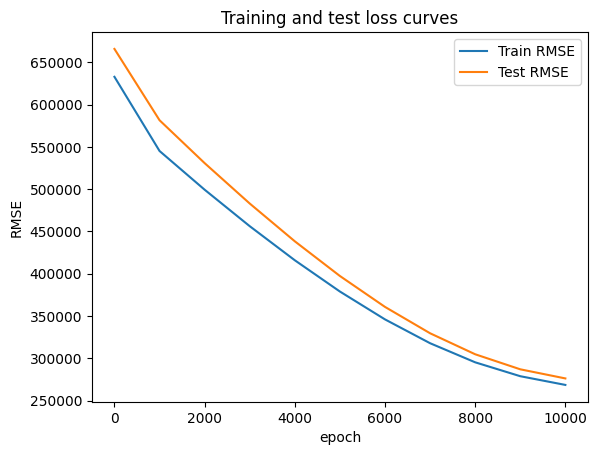

In [28]:
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label = 'Train RMSE')
plt.plot(epoch_count, test_loss_values, label='Test RMSE')
plt.title("Training and test loss curves")
plt.ylabel('RMSE')
plt.xlabel('epoch')
plt.legend()

The result is that the training and test RMSE (Root Mean Squared Error) curves are decreasing as the number of epochs increases during the training process.The decreasing trend of both the training and test RMSE curves as the number of epochs increases indicates that the model is learning and improving its performance during the training process.